<a href="https://colab.research.google.com/github/lmoroney/tfbook/blob/master/chapter7/sarcasm_simplelstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-04-16 17:34:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2020-04-16 17:34:08 (72.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

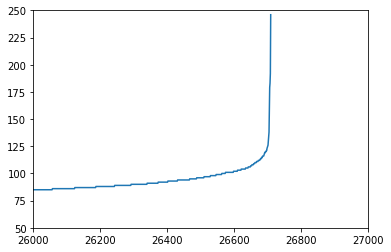

85


In [131]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [0]:
vocab_size = 2000
embedding_dim = 7
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 24000

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [135]:
wc=tokenizer.word_counts
print(wc)

OrderedDict([('former', 96), ('versace', 1), ('store', 47), ('clerk', 9), ('sues', 16), ('secret', 83), ('black', 248), ('code', 19), ('minority', 13), ('shoppers', 3), ('roseanne', 3), ('revival', 10), ('catches', 10), ('thorny', 3), ('political', 77), ('mood', 13), ('better', 107), ('worse', 35), ('mom', 174), ('starting', 41), ('fear', 43), ('sons', 36), ('web', 17), ('series', 55), ('closest', 5), ('thing', 133), ('will', 502), ('grandchild', 2), ('boehner', 26), ('just', 528), ('wants', 126), ('wife', 77), ('listen', 21), ('not', 668), ('come', 94), ('alternative', 13), ('debt', 23), ('reduction', 4), ('ideas', 37), ('j', 42), ('k', 41), ('rowling', 5), ('wishes', 35), ('snape', 2), ('happy', 53), ('birthday', 58), ('magical', 27), ('way', 246), ('advancing', 2), ('worlds', 85), ('women', 301), ('fascinating', 4), ('case', 81), ('eating', 66), ('lab', 8), ('grown', 17), ('meat', 26), ('ceo', 62), ('send', 33), ('kids', 172), ('school', 213), ('work', 176), ('company', 84), ('top',

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'not': 5, 'just': 6, 'will': 7, 'one': 8, 'year': 9, 'report': 10, 'area': 11, 'donald': 12, 'u': 13, 'day': 14, 's': 15, 'says': 16, 'can': 17, 'woman': 18, 'first': 19, 'time': 20, 'like': 21, 'no': 22, 'get': 23, 'trumps': 24, 'old': 25, 'off': 26, 'now': 27, 'people': 28, 'life': 29, 'obama': 30, 'house': 31, 'white': 32, 'women': 33, 'make': 34, 'back': 35, 'still': 36, 'clinton': 37, '5': 38, 'world': 39, 'years': 40, 'americans': 41, 'black': 42, 'way': 43, 'family': 44, 'study': 45, 'gop': 46, 'bill': 47, 'best': 48, 'american': 49, '3': 50, 'school': 51, 'police': 52, 'watch': 53, 'show': 54, 'really': 55, 'last': 56, 'president': 57, 'home': 58, 'know': 59, 'death': 60, 'video': 61, 'finds': 62, 'cant': 63, 'things': 64, 'good': 65, '10': 66, 'hillary': 67, 'state': 68, 'going': 69, 'love': 70, 'nation': 71, '2': 72, 'health': 73, 'big': 74, 'parents': 75, 'may': 76, 'say': 77, 'every': 78, 'need': 79, 'work': 80, 'mom': 81, 'party

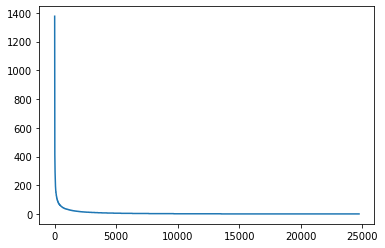

34
18


In [136]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
#plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])

In [137]:
print(ys[3125])
print(ys[10000])
print(ys[12156])

11
2
2


In [0]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [182]:
model.summary()


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, None, 7)           14000     
_________________________________________________________________
bidirectional_36 (Bidirectio (None, 200)               86400     
_________________________________________________________________
dense_73 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 33        
Total params: 106,865
Trainable params: 106,865
Non-trainable params: 0
_________________________________________________________________


In [189]:
num_epochs = 150
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/150
750/750 - 8s - loss: 0.9856 - accuracy: 0.6312 - val_loss: 0.6695 - val_accuracy: 0.5748
Epoch 2/150
750/750 - 7s - loss: 0.5062 - accuracy: 0.7724 - val_loss: 0.4825 - val_accuracy: 0.7826
Epoch 3/150
750/750 - 7s - loss: 0.4327 - accuracy: 0.8100 - val_loss: 0.4674 - val_accuracy: 0.7981
Epoch 4/150
750/750 - 7s - loss: 0.4017 - accuracy: 0.8264 - val_loss: 0.4675 - val_accuracy: 0.7796
Epoch 5/150
750/750 - 7s - loss: 0.3813 - accuracy: 0.8367 - val_loss: 0.4539 - val_accuracy: 0.7966
Epoch 6/150
750/750 - 7s - loss: 0.3749 - accuracy: 0.8398 - val_loss: 0.4614 - val_accuracy: 0.7940
Epoch 7/150
750/750 - 7s - loss: 0.3612 - accuracy: 0.8452 - val_loss: 0.4677 - val_accuracy: 0.7870
Epoch 8/150
750/750 - 7s - loss: 0.3554 - accuracy: 0.8478 - val_loss: 0.4881 - val_accuracy: 0.7892
Epoch 9/150
750/750 - 7s - loss: 0.3512 - accuracy: 0.8516 - val_loss: 0.5000 - val_accuracy: 0.7612
Epoch 10/150
750/750 - 7s - loss: 0.3461 - accuracy: 0.8539 - val_loss: 0.4845 - val_accura

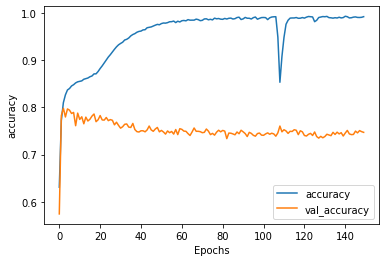

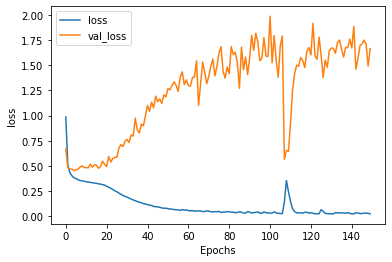

In [191]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [192]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting fear sons <OOV> series <OOV> thing will <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting fear sons web series closest thing will grandchild 
1


In [144]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(2000, 7)


In [145]:
print(reverse_word_index[2])
print(weights[2])

new
[-0.02495504 -0.06072978 -0.12212858  0.13211063  0.07323561  0.22818577
  0.1856794 ]


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "I lived in Ireland, so in High School they made me learn to speak and write in Gaelic",
                  "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]
sequences = tokenizer.texts_to_sequences(test_sentences)
#print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#print(padded)

predictions = model.predict(padded)
#print(predictions[:, max_length-1])

In [207]:
print(predictions)

[[5.1777130e-05]
 [9.9985003e-01]
 [9.9987590e-01]
 [1.1827203e-03]]
